# Analyzing Sales Strategies for Stationery Product Launch

##1. Introduction

### Project Overview
This project is initiated by the Analytics Head at Pens and Printers, a company known for selling quality office products since 1984. The company has recently launched a new line of office stationery and is exploring different sales strategies to boost sales and profitability. The focus of this project is to analyze sales data from three different strategies—emails, phone calls, and a combination of both—to find out which method works best for selling the new products.

### Objectives
The main goals of this project are:

1. **Analyze Sales Data**: Review sales data from three different strategies used for the new product line.
2. **Understand Customer Engagement**: Check how different sales methods impact customer reach and revenue.
3. **Recommend the Best Sales Strategy**: Suggest the most effective strategy that uses less effort, increases profits, and improves customer satisfaction.




### Dataset Description
The dataset for this analysis can be downloaded using the following link:
https://www.kaggle.com/datasets/lorenzovzquez/pens-and-printers-product-saleshas

Here are the key features of the dataset:

* **week**: The week in which the sale was made, counted as weeks since the product launch.
* **sales_method**: The method of sale used for the customer (Email, Call, Email and Call).
* **customer_id**: A unique identifier for each customer.
* **nb_sold**: Number of new products sold to the customer.
* **revenue**: Revenue generated from the sales, rounded to two decimal places.
* **years_as_customer**: How long the customer has been purchasing from Pens and Printers.
* **nb_site_visits**: The number of times the customer visited the company's website in the last six months.
* **state**: The U.S. state where the customer is located.




##2. Dataset Loading and Overview

### Importing Libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Load the Dataset into a Pandas DataFrame

In [143]:
dataset = pd.read_csv('product_sales.csv')

### Data Overview

In [144]:
dataset.head(5)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


### Dimensions of the Dataset

In [145]:
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} features (columns) in the dataset.")

There are 15000 rows and 8 features (columns) in the dataset.


In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Statistical Summary of the Dataset

In [147]:
dataset.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


Observations:

* The dataset consists of 15000 entries.
* There are 8 columns in total.
* These columns are a mix of numerical (int64 and float64) and categorical (object) data types.
* There are missing values only in the revenue column of the dataset, which will be dealt with in the data validation phase.

##3. Exploring the Columns of the Dataset

### 'week' Column

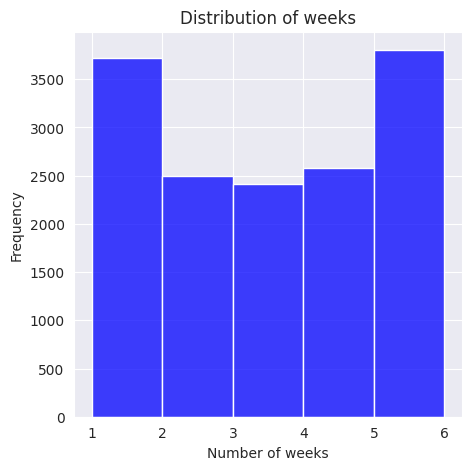

In [148]:
plt.figure(figsize=(5, 5))
sns.histplot(dataset['week'], bins=5, color='blue')
plt.title('Distribution of weeks')
plt.xlabel('Number of weeks')
plt.ylabel('Frequency')
plt.show()

The above histogram shows that the first and sixth weeks have had the highest sales.

### 'sales_method' Column

In [149]:
print(dataset['sales_method'].value_counts())

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


There are supposed to be only 3 different categories, but there are 5 here. This is due to text inconsistency, and this will be addressed in the data validation phase.

### 'customer_id' Column

In [150]:
dataset['customer_id'].nunique()

15000

As there are 15000 rows in the dataset, hence this validates that each customer has a unique ID and there are no duplicates.

### 'nb_sold' Column

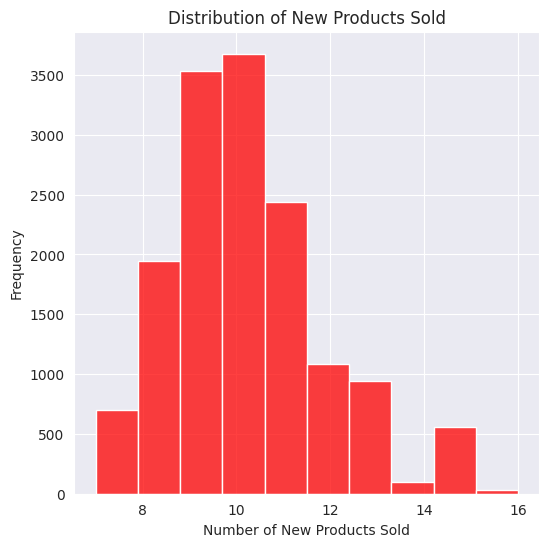

In [151]:
plt.figure(figsize=(6, 6))
sns.histplot(dataset['nb_sold'], bins=10, color='red')
plt.title('Distribution of New Products Sold')
plt.xlabel('Number of New Products Sold')
plt.ylabel('Frequency')
plt.show()

Most of the new products sold to an individual customer are between 8 and 12.

### 'revenue' Column

In [152]:
dataset['revenue'].describe()

,revenue
count,13926.000000
mean,93.934943
std,47.435312
min,32.540000
25%,52.470000
50%,89.500000
75%,107.327500
max,238.320000


There are 1074 missing values in the dataset, and by comparing the mean (93.93) and the median (89.50), it's clear that the distribution is right-skewed and the mean is pulled to the right due to outliers.

### 'years_as_customer' Column

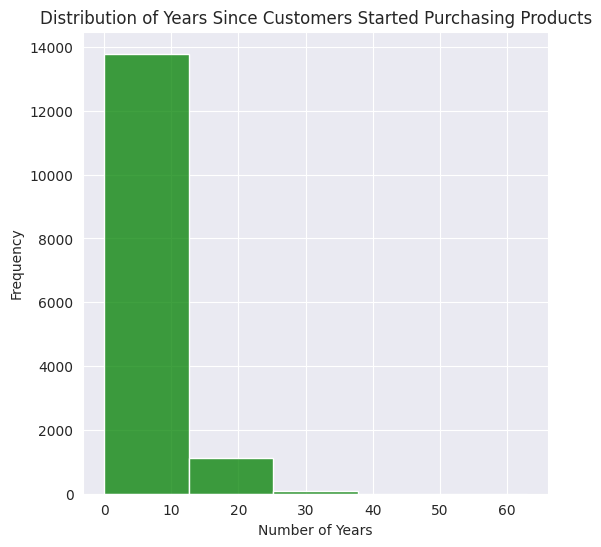

In [153]:
plt.figure(figsize=(6, 6))
sns.histplot(dataset['years_as_customer'], bins=5, color='green')
plt.title('Distribution of Years Since Customers Started Purchasing Products')
plt.xlabel('Number of Years')
plt.ylabel('Frequency')
plt.show()

Most of the customers started purchasing products 10-15 years ago.

### 'nb_site_visits' Column

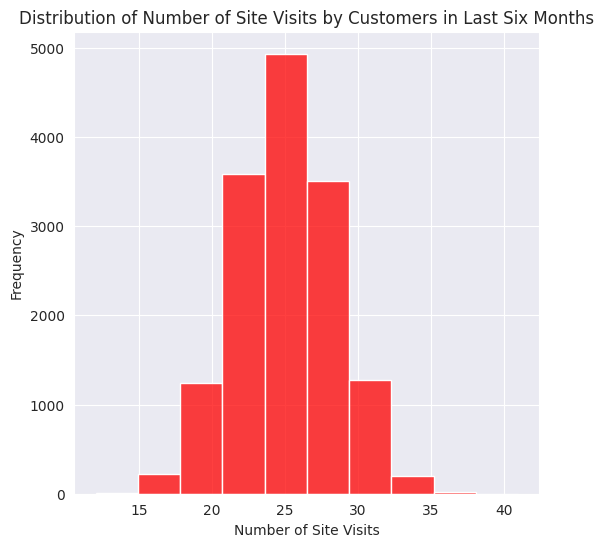

In [154]:
plt.figure(figsize=(6, 6))
sns.histplot(dataset['nb_site_visits'], bins=10, color='red')
plt.title('Distribution of Number of Site Visits by Customers in Last Six Months')
plt.xlabel('Number of Site Visits')
plt.ylabel('Frequency')
plt.show()

Most of the site visits by customers in the last six months are between 20 and 30. The distribution is perfectly normal and symmetric with mean at 25.

### 'state' Column

In [155]:
dataset['state'].value_counts().head()

,count
state,
California,1872
Texas,1187
New York,965
Florida,904
Illinois,617


The top 5 US states where the customers are from are: California, Texas, New York, Florida, and Illinois.

##4. Data Validation and Cleaning
The dataset contains 15000 rows and 8 columns before cleaning and validation. I have validated all the columns against the criteria in the dataset table:

**week**: numeric values, same as the description and with no missing values, hence, no cleaning is needed.

**sales_method**: Initally, there were 5 categories, as opposed to 3, which was to be the case, and this was due to text inconsistency, after cleaning this column by capitalizing the column values and making a replacement, there are 3 different categories and without missing values, same as the description.

**customer_id**: string values without missing values, same as the description. No cleaning is needed.

**nb_sold**: numeric values without missing values, same as the description and hence no cleaning is needed.

**revenue**: numeric values with 1074 missing values, and these missing values were imputed with the median value, rounded to 2 decimal places.

**years_as_customer**: numeric values with no missing values, however, there are a few values which are erroneous, because they indicate that the customers have been buying products from the company even before the company was founded, so they were replaced with the maximum possible value, which is 2024 - 1984 = 40.

**nb_site_visits**: numeric values, same as the description, no cleaning is required.

**state**: string, with 50 possible values, no missing values, same as the description, no cleaning is needed.

After the data validation, the dataset contains 15000 rows and 8 columns without missing values.

In [156]:
# Cleaning the 'sales_method' column
print("Before cleaning, the categories for the 'sales_method' are:")
print(dataset['sales_method'].value_counts())
dataset['sales_method'] = dataset['sales_method'].str.replace('em + call', 'Email + Call')
dataset['sales_method'] = dataset['sales_method'].str.replace('email', 'Email')
print("\nAfter cleaning, the categories for the 'sales_method' are:")
print(dataset['sales_method'].value_counts())

# Cleaning the 'revenue' column
dataset['revenue'].fillna(dataset['revenue'].median(), inplace=True)
dataset['revenue'] = dataset['revenue'].round(2)

# Cleaning the 'years_as_customer' column
dataset.loc[dataset['years_as_customer'] > 40, 'years_as_customer'] = 40

Before cleaning, the categories for the 'sales_method' are:
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

After cleaning, the categories for the 'sales_method' are:
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


##5. Exploratory Data Analysis

### How many customers were there for each approach?

There were a total of 7466 customers for the approach using Email, 4962 customers using Call, and 2572 customers for using both approaches, that is Email and Call.



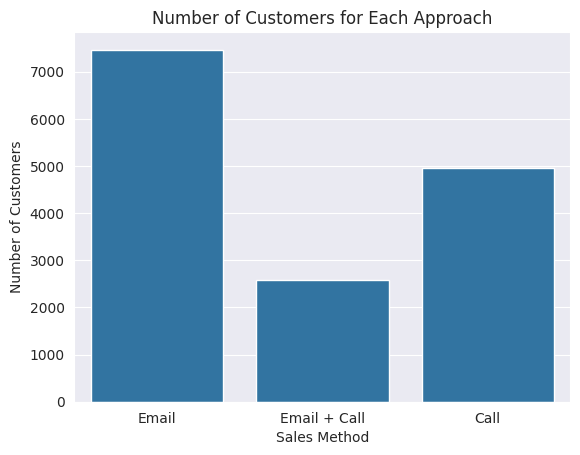

In [157]:
sns.countplot(x='sales_method', data=dataset)
plt.title('Number of Customers for Each Approach')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()

### What does the spread of the revenue look like overall?

The overall spread of the revenue data is multimodal, with several distinct peaks, particularly around the values of 50, 100, 150, and 200. This indicates that the revenue data has multiple clusters with higher frequencies at these values. The revenue values are not uniformly distributed and show significant variability across the range.

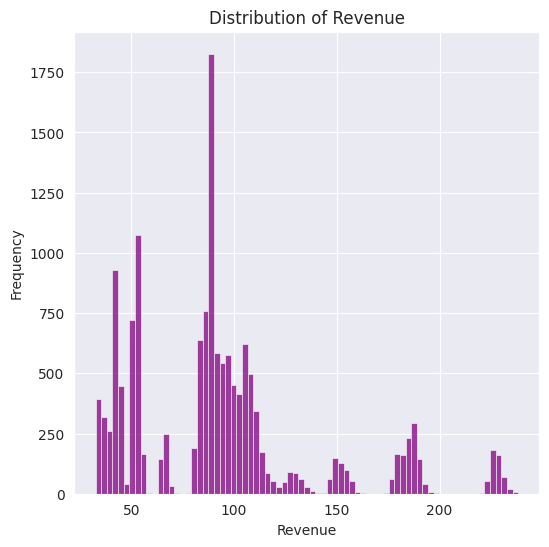

In [158]:
plt.figure(figsize=(6, 6))
sns.histplot(dataset['revenue'], bins=75, color='purple')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

### What does the spread of the revenue look like for each method?


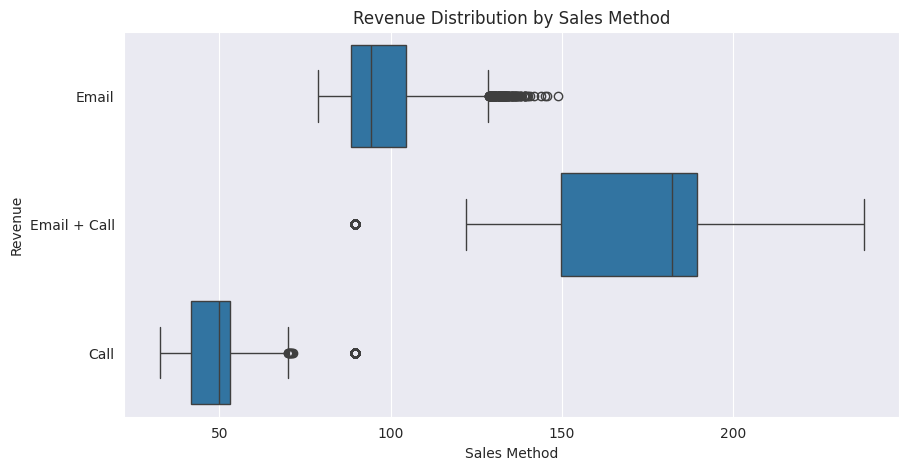

In [159]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='revenue', y='sales_method', data=dataset)
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

The above box plot reveals the distribution of revenue for three different sales methods:

1. **Email**:
   - Revenue is typically high, with most values between 90 and 120.
   - Median revenue is around 90.
   - There are several high-value outliers above 125.

2. **Email + Call**:
   - Revenue has a wide spread, ranging from 120 to 240.
   - Median revenue is around 180.
   - A few low-value outliers are present below 100.

3. **Call**:
   - Revenue is generally lower, mostly between 40 and 55.
   - Median revenue is almost 50.
   - A few outliers exist above 65.

To summarize, the **Email** method generates higher revenue with some high outliers, the **Email + Call** method shows a broad revenue range with a higher median, and the **Call** method results in lower revenue with a few outliers.


### Was there any difference in revenue over time for each of the methods?



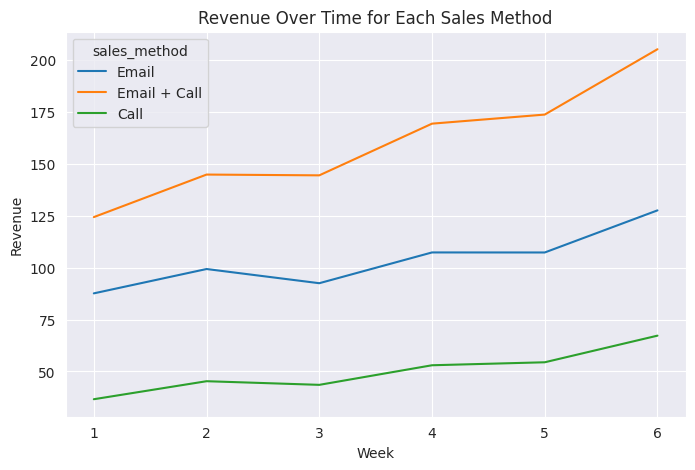

In [160]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='week', y='revenue', hue='sales_method', errorbar=None, data=dataset)
plt.title('Revenue Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

The above line plot gives us the following findings:

- The 'Email + Call' method shows the most substantial and consistent increase in revenue over time.
- The 'Email' method also shows an increasing trend but with more fluctuations.
- The 'Call' method has the lowest and flattest revenue trend over time.

This indicates that combining email and call methods tends to generate higher and steadily increasing revenue over time compared to using email or call methods alone.



##6. Conclusions

### Recommended Method
As it is clear from the above visualizations, the 'Email + Call' sales method generates much more revenue as compared to the other 2 approaches, it has the most substantial and consistent increase in revenue over time compared to the other 2. Also taking in consideration the effort of the Sales team to perform each of these methods, which shows that the most convenient method is 'Email', followed by 'Email + Call', and lastly 'Call'. Taking all these factors into account, it's recommended to continue using the 'Email' and 'Email + Call' methods, and phase out the usage of 'Call' method.

### Business Metrics
The goal of the business is to select the most effective sales approach. For this purpose, the metric I've chosen is **'Average Revenue Per Each Sales Approach'**. This takes into account the total revenue generated by each approach, and also the total number of customers for each of the approaches.

The business should take into consideration this metric to select the best sales approach. Based on the given data, the average revenue for 'Email + Call' approach is approximately 171, 97 for 'Email', and 49 for 'Call'.

### Recommendations
The following steps are recommended:
- Increase the usage of 'Email + Call' sales approach as it's the most effective, based on the data.
- Decrease but not finish the usage of 'Email' approach, as it's also somewhat effective.
- Completely finish the usage of 'Call' approach as it not only requires a lot of human effort, but also plays a very minor role in revenue generation as compared to the other 2 approaches.
- If possible, try to reduce the effort taken for the 'Email + Call' approach to increase efficiency.